In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import regionprops

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/Gabriels_experiments_STED/'
protein="TNR" #TNR,Agg,WFA,HABP

In [4]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[],
          "synapsechannelno":[],
           "Manual syt spots mask":[]}
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "_analyse" in str(filelist[i]):
        print(1)
        if ("ocus" in str(filelist[i]))==False:
            print(2)
            if ("Pop" in str(filelist[i]))==False:
                print(3)
                if ("save" in str(filelist[i]))==False:
                    print(4)
                    if filelist[i].endswith(".tif"): 
                        print(5)
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            print(6)
                            results["filename"].append(filelist[i][:-12])
                            results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                            channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                            exec(open(channeldir+"/channels.txt").read())
                            results["ecmchannelno"].append(ecmchannelno)
                            results["synapsechannelno"].append(synapsechannelno)                                        

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5


1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
4


## load random image

Image name: 04_001_ExpControl
Experimental condition: 12hrs_DMSO


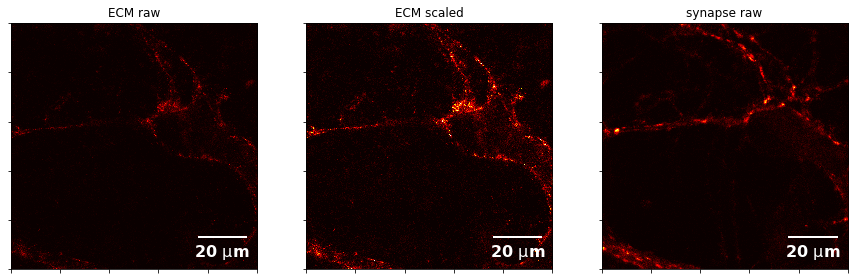

In [5]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=results["ecmchannelno"][randomno]
synapse_channel_no=results["synapsechannelno"][randomno]

ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
synapse_image_name=results["filename"][randomno]+" Ch"+str(synapse_channel_no)+" {0}.tif"

print("Image name:",results["filename"][randomno].split('/')[-1])
print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
synapse_image=pims.open(synapse_image_name)[0]

figure=plt.figure(figsize=(15,15))
figure.add_subplot(131)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
figure.add_subplot(132)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('ECM scaled')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(133)
plt.imshow(synapse_image,interpolation='none',cmap='hot')
plt.title('synapse raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

## load synapse spots

In [7]:
for image in range(0,len(results["filename"])):
    results["Manual syt spots mask"].append(np.load(results["filename"][image]+'_syt_spots_mask.npy'))

## Sanity check

80


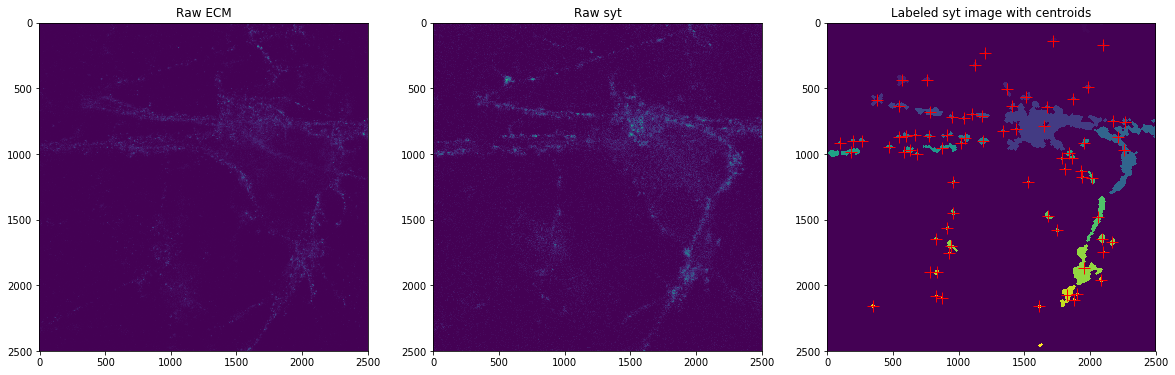

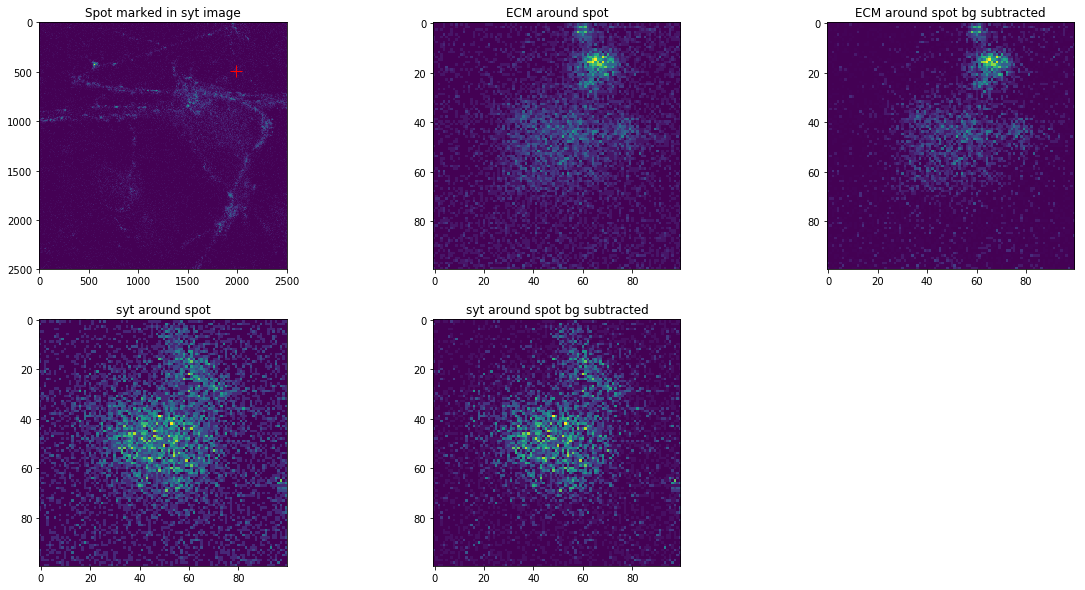

In [9]:
randomno=np.random.randint(1,len(results["filename"]))


ecm_distribution_around_synapses={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "original_synapse_at_single_spot":[],
                                  "mean_intensty_original_synapse":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  "original_synapse_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_synapse bg subtracted":[]
                                 }

ecm_channel_no=results["ecmchannelno"][randomno]
ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
ecm_image=pims.open(ecm_image_name)[0]
synapse_channel_no=results["synapsechannelno"][randomno]
synapse_image_name=results["filename"][randomno]+" Ch"+str(synapse_channel_no)+" {0}.tif"
synapse_image=pims.open(synapse_image_name)[0]
#label images
spots_mask=results["Manual syt spots mask"][randomno]
spots_labeled, cc_num=ndi.label(spots_mask)
#cut out ecm image 4microns around each spot - 200pixels
print(cc_num)
regions = regionprops(spots_labeled)
#fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow(spots_mask,cmap=plt.cm.gray)
synapse_spots_results_sanity=[]
for props in regions:    
    y0, x0 = props.centroid
    center_of_spot=[0,0]
    center_of_spot[0]=np.round(y0).astype(int)
    center_of_spot[1]=np.round(x0).astype(int)
    #check if the spot gets cut off at the border before taking
    if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
        #cut out the ecm around spot
        ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
              center_of_spot[1]-50:center_of_spot[1]+50]
        #cut out the synapse around spot
        original_synapse_at_single_spot=synapse_image[center_of_spot[0]-50:center_of_spot[0]+50,
              center_of_spot[1]-50:center_of_spot[1]+50]
        if ecm_around_spot.shape==(100,100):
            #save centroid
            synapse_spots_results_sanity.append(props.centroid)
            ecm_distribution_around_synapses["filename"].append(results["filename"][randomno])
            ecm_distribution_around_synapses["exp condition"].append(results["exp condition"][randomno])
            #append mean synapse intensity at spot
            mean_intensty_original_synapse=np.mean(original_synapse_at_single_spot)
            ecm_distribution_around_synapses["mean_intensty_original_synapse"].append(mean_intensty_original_synapse)
            #append ecm spot matrix
            ecm_distribution_around_synapses["ecm_around_single_spot"].append(ecm_around_spot)
            #append synapse spot matrix
            ecm_distribution_around_synapses["original_synapse_at_single_spot"].append(original_synapse_at_single_spot)
            #append ecm spot matrix
            ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

            #after bg subtraction
            ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
            ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
            bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
            ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
            ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

            synapse_around_spot_bgsub=np.array(deepcopy(original_synapse_at_single_spot))
            synapse_around_spot_bgsub=np.divide(synapse_around_spot_bgsub,255)
            bg_synapse=np.mean(ndi.median_filter(synapse_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(synapse_around_spot_bgsub,size=5))
            synapse_around_spot_bgsub=np.subtract(synapse_around_spot_bgsub,bg_synapse)
            synapse_around_spot_bgsub[synapse_around_spot_bgsub<0]=0

            ecm_distribution_around_synapses["mean_intensty_original_synapse bg subtracted"].append(np.nanmean(synapse_around_spot_bgsub))
            ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
            ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"].append(synapse_around_spot_bgsub)
            ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))

fig=plt.figure(figsize=(20,10))
fig.add_subplot(131)
plt.title('Raw ECM')
plt.imshow(ecm_image)

fig.add_subplot(132)
plt.title('Raw syt')
plt.imshow(synapse_image)

fig.add_subplot(133)
plt.title('Labeled syt image with centroids')
plt.imshow(spots_labeled)
for i in range(0,len(synapse_spots_results_sanity)):
    plt.plot(synapse_spots_results_sanity[i][1],synapse_spots_results_sanity[i][0],'+',color='r',markersize=12)

#show random spot
randomno=np.random.randint(1,len(ecm_distribution_around_synapses))
centroid=synapse_spots_results_sanity[randomno]
fig=plt.figure(figsize=(20,10))
fig.add_subplot(231)
plt.title('Spot marked in syt image')
plt.imshow(synapse_image)
plt.plot(synapse_spots_results_sanity[randomno][1],synapse_spots_results_sanity[randomno][0],'+',color='r',markersize=12)

fig.add_subplot(232)
plt.title('ECM around spot')
plt.imshow(ecm_distribution_around_synapses["ecm_around_single_spot"][randomno])

fig.add_subplot(233)
plt.title('ECM around spot bg subtracted')
plt.imshow(ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"][randomno])

fig.add_subplot(234)
plt.title('syt around spot')
plt.imshow(ecm_distribution_around_synapses["original_synapse_at_single_spot"][randomno])

fig.add_subplot(235)
plt.title('syt around spot bg subtracted')
plt.imshow(ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"][randomno])


## Make individual spot images

In [10]:
#regionprops centroid = center of spot
ecm_distribution_around_synapses={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  
                                  "original_synapse_at_single_spot":[],
                                  "mean_intensty_original_synapse":[],
                                  "original_synapse_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_synapse bg subtracted":[]}
                                  
for i in range(0,len(results["filename"])):
    #read the image
    ecm_channel_no=results["ecmchannelno"][i]
    ecm_image_name=results["filename"][i]+" Ch"+str(ecm_channel_no)+" {0}.tif"
    ecm_image=pims.open(ecm_image_name)[0]
    synapse_channel_no=results["synapsechannelno"][i]
    synapse_image_name=results["filename"][i]+" Ch"+str(synapse_channel_no)+" {0}.tif"
    synapse_image=pims.open(synapse_image_name)[0]
    
    #label connected components in spots mask
    spots_mask=results["Manual syt spots mask"][i]
    spots_labeled, cc_num=ndi.label(spots_mask)
    #cut out ecm around spots - 100px by 100px (2x2 microns) 
    print('No spots in image: ' + str(cc_num))
    regions = regionprops(spots_labeled)
    for props in regions:
        y0, x0 = props.centroid
        center_of_spot=[0,0]
        center_of_spot[0]=np.round(y0).astype(int)
        center_of_spot[1]=np.round(x0).astype(int)
        #check if the spot gets cut off at the border before taking
        if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
            #cut out the ecm around spot
            ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
                  center_of_spot[1]-50:center_of_spot[1]+50]
            #cut out the synapse around spot
            original_synapse_at_single_spot=synapse_image[center_of_spot[0]-50:center_of_spot[0]+50,
                  center_of_spot[1]-50:center_of_spot[1]+50]
            if ecm_around_spot.shape==(100,100):
                ecm_distribution_around_synapses["filename"].append(results["filename"][i])
                ecm_distribution_around_synapses["exp condition"].append(results["exp condition"][i])
                #append mean synapse intensity at spot
                mean_intensty_original_synapse=np.mean(original_synapse_at_single_spot)
                ecm_distribution_around_synapses["mean_intensty_original_synapse"].append(mean_intensty_original_synapse)
                #append ecm spot matrix
                ecm_distribution_around_synapses["ecm_around_single_spot"].append(ecm_around_spot)
                #append synapse spot matrix
                ecm_distribution_around_synapses["original_synapse_at_single_spot"].append(original_synapse_at_single_spot)
                #append ecm spot matrix
                ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

                #after bg subtraction
                ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
                ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
                bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
                ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
                ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

                synapse_around_spot_bgsub=np.array(deepcopy(original_synapse_at_single_spot))
                synapse_around_spot_bgsub=np.divide(synapse_around_spot_bgsub,255)
                bg_synapse=np.mean(ndi.median_filter(synapse_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(synapse_around_spot_bgsub,size=5))
                synapse_around_spot_bgsub=np.subtract(synapse_around_spot_bgsub,bg_synapse)
                synapse_around_spot_bgsub[synapse_around_spot_bgsub<0]=0

                ecm_distribution_around_synapses["mean_intensty_original_synapse bg subtracted"].append(np.nanmean(synapse_around_spot_bgsub))
                ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
                ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"].append(synapse_around_spot_bgsub)
                ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))            

No spots in image: 169
No spots in image: 121
No spots in image: 56
No spots in image: 109
No spots in image: 154
No spots in image: 187
No spots in image: 140
No spots in image: 133
No spots in image: 87
No spots in image: 117
No spots in image: 159
No spots in image: 128
No spots in image: 142
No spots in image: 79
No spots in image: 245
No spots in image: 84
No spots in image: 126
No spots in image: 95
No spots in image: 164
No spots in image: 194
No spots in image: 264
No spots in image: 81
No spots in image: 164
No spots in image: 82
No spots in image: 211
No spots in image: 170
No spots in image: 121
No spots in image: 274
No spots in image: 99
No spots in image: 128
No spots in image: 59
No spots in image: 59
No spots in image: 42
No spots in image: 72
No spots in image: 84
No spots in image: 55
No spots in image: 102
No spots in image: 155
No spots in image: 167
No spots in image: 144
No spots in image: 122
No spots in image: 35
No spots in image: 130
No spots in image: 113
No 

## Sanity check: see that spot image takes the correct part of the ecm image

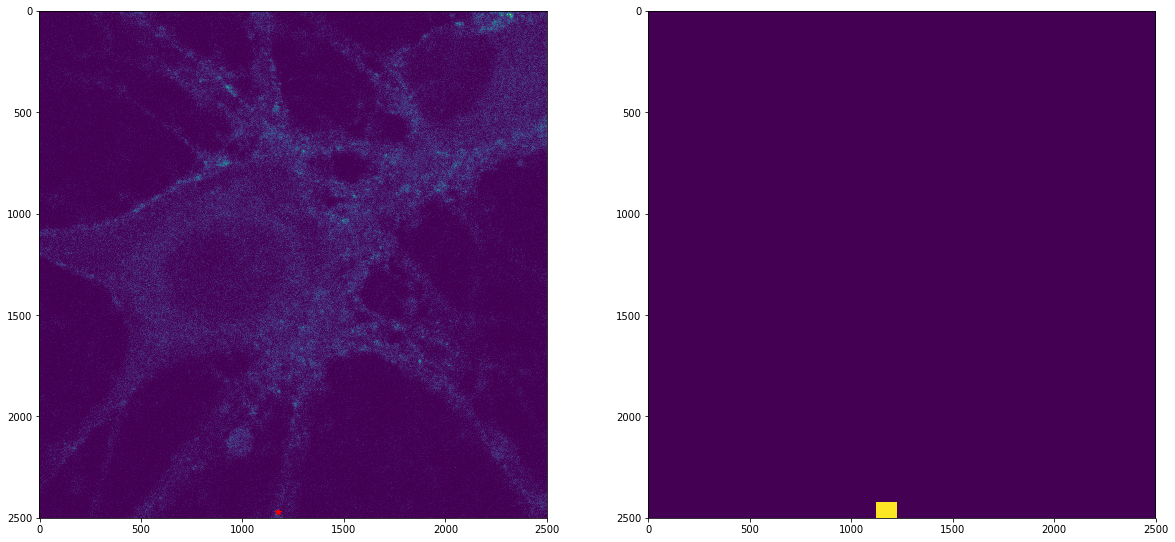

In [11]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(121)
plt.imshow(synapse_image)
plt.plot(center_of_spot[1],center_of_spot[0],'*r')
synapse_copy=deepcopy(synapse_image)
if ((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0)&(center_of_spot[0]-50>0) & (center_of_spot[0]+50>0)):
    synapse_copy[center_of_spot[0]-50:center_of_spot[0]+50,
             center_of_spot[1]-50:center_of_spot[1]+50]=100
synapse_copy[synapse_copy<100]=0
fig.add_subplot(122)
plt.imshow(synapse_copy)

## Dataframe

In [12]:
df=pd.DataFrame(ecm_distribution_around_synapses)

## Plot a random spots image

Text(0.5, 1.0, 'ECM around synapse spot bg subtracted')

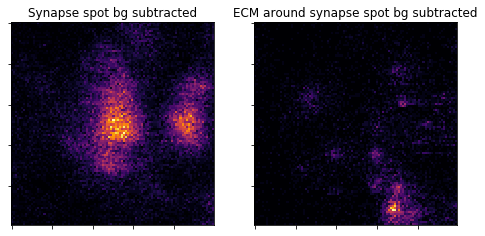

In [15]:
randomno=np.random.randint(1,len(df))
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.imshow(df["original_synapse_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Synapse spot bg subtracted')
fig.add_subplot(122)
plt.imshow(df["ecm_around_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot bg subtracted')

## Add radial average

In [16]:
## radial_average version 2
def radial_average(image):
    import numpy as np
    import scipy
    from scipy import ndimage
    import matplotlib.pyplot as plt
    f = image
    sx, sy = f.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    r = np.hypot(X - sx/2, Y - sy/2)
    rbin = (20* r/r.max()).astype(np.int) ##30 rings --> r-
    radial_mean = ndimage.mean(f, labels=rbin, index=np.arange(1, rbin.max() +1))
    return radial_mean

## Add meaningful columns to the dataframe

In [81]:
#make df, which also contains column names for plotting (drug, condition)
df['Time']='None'
df.loc[df["filename"].str.contains('2hr'), 'Time'] = '2hrs'
df.loc[df["filename"].str.contains('4hr'), 'Time'] = '4hrs'
df.loc[df["filename"].str.contains('12hr'), 'Time'] = '12hrs'
df.loc[df['filename'].str.contains('Ctrl'), 'Time'] = 'Unblocked Control'
df.loc[df['filename'].str.contains('Unblocked'), 'Time'] = 'Unblocked Control'

df.loc[df['filename'].str.contains('Bic'), 'Drug'] = 'Bic'
df.loc[df['filename'].str.contains('DMSO'), 'Drug'] = 'DMSO'
df.loc[df['filename'].str.contains('Ctrl'), 'Drug'] = 'DMSO'
df.loc[df['filename'].str.contains('Unblocked'), 'Drug'] = 'DMSO'

#nicely written treatment condition for plotting
df['Condition']='None'
df.loc[df['filename'].str.contains('2hrs_Bic'), 'Condition'] = '2hr + Bic'
df.loc[df['filename'].str.contains('4hrs_Bic'), 'Condition'] = '4hr + Bic'
df.loc[df['filename'].str.contains('2hrs_DMSO'), 'Condition'] = '2hr + DMSO'
df.loc[df['filename'].str.contains('4hrs_DMSO'), 'Condition'] = '4hr + DMSO'
df.loc[df['filename'].str.contains('12hrs_Bic'), 'Condition'] = '12hr + Bic'
df.loc[df['filename'].str.contains('12hrs_DMSO'), 'Condition'] = '12hr + DMSO'
df.loc[df['filename'].str.contains('Ctrl'), 'Condition'] = 'Unblocked Control'
df.loc[df['filename'].str.contains('Unblocked'), 'Condition'] = 'Unblocked Control'

df["expname"]='None'
df.loc[df['filename'].str.contains('20181002'), 'expname'] = '20181002'
df.loc[df['filename'].str.contains('20181011'), 'expname'] = '20181011'
df.loc[df['filename'].str.contains('20181116'), 'expname'] = '20181116'

In [82]:
df2=deepcopy(df[df["Time"]=="12hrs"])
df2=df2.reset_index()
df2["ecm mean int norm2med"]=df2["ecm_around_single_spot_mean_intensity bg subtracted"]
df2["syt mean int norm2med"]=df2["mean_intensty_original_synapse bg subtracted"]

In [86]:
df2["ecm mean int norm2med"][0:10]

0    2.602620
1    1.714716
2    1.034430
3    1.083408
4    0.375734
5    2.201519
6    2.251628
7    2.582652
8    2.095614
9    1.343363
Name: ecm mean int norm2med, dtype: float64

In [85]:
expnam=[]
medtnr=[]
medsyt=[]
for exp in df2["expname"].unique():
    dfexp=df2[df2["expname"]==exp]
    med_tnr=dfexp["ecm_around_single_spot_mean_intensity bg subtracted"].median()
    med_syt=dfexp["mean_intensty_original_synapse bg subtracted"].median()
    print(exp+' - med tnr: '+str(med_tnr)+' - med syt: '+str(med_syt))
    expnam.append(exp)
    medtnr.append(med_tnr)
    medsyt.append(med_syt)
df2["ecm mean int norm2med"]=np.nan
df2["syt mean int norm2med"]=np.nan
for i in range(0,len(df2)):
    if df2["expname"][i]==expnam[0]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[0]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_synapse bg subtracted"][i]/medsyt[0]
    if df2["expname"][i]==expnam[1]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[1]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_synapse bg subtracted"][i]/medsyt[1]
    if df2["expname"][i]==expnam[2]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[2]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_synapse bg subtracted"][i]/medsyt[2]

20181002 - med tnr: 0.0035072105882352944 - med syt: 0.007297225490196078
20181011 - med tnr: 0.003285102666666666 - med syt: 0.0031213255294117647
20181116 - med tnr: 0.002650112117647059 - med syt: 0.003286833352941176


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.p

In [87]:
df2=df2[df2["ecm mean int norm2med"]<
               df2["ecm mean int norm2med"].quantile(.99)]
df2=df2[df2["syt mean int norm2med"]<
               df2["syt mean int norm2med"].quantile(.99)]

## Correlate vGlut intensity to TNR intensity - all spots together

### scatterplot: each point = one spot, x= TNR mean intensity, y=syt mean intensity

<Figure size 432x288 with 0 Axes>

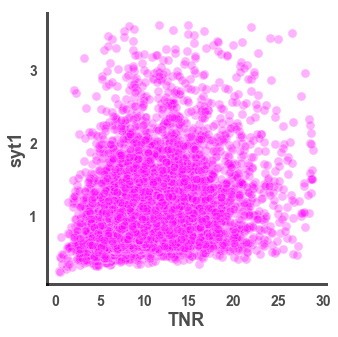

In [88]:
from matplotlib import ticker
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

fig=plt.figure(figsize=(5,5))
g=sns.scatterplot(x="ecm mean int norm2med",
                  y="syt mean int norm2med",data=df2,
               color="magenta",alpha=0.3,s=80)
#g.set_xscale('log')
plt.title('')
plt.locator_params(axis='y', nbins=5)
plt.yticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)
plt.xticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)


g.tick_params(width=3,color='black')
#g.set_ylabel('Fluorescence intensity (AU)',color='black',alpha=.7,labelpad=3,size=28,weight='bold')
g.set_ylabel('syt1',color='black',alpha=.7,fontsize=18,weight='bold')
g.set_xlabel('TNR',color='black',alpha=.7,fontsize=18,weight='bold')
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)

scale_x=1/10
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.xaxis.set_major_formatter(ticks_x)



In [89]:
from pydoc import help
from scipy.stats.stats import pearsonr
pearsonr(df2["ecm mean int norm2med"],df2["syt mean int norm2med"])

(0.2637173170059487, 1.475383006429233e-93)

<Figure size 432x288 with 0 Axes>

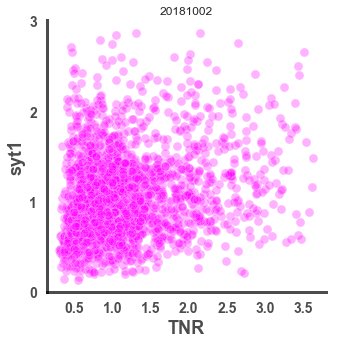

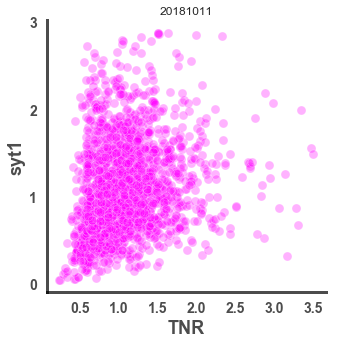

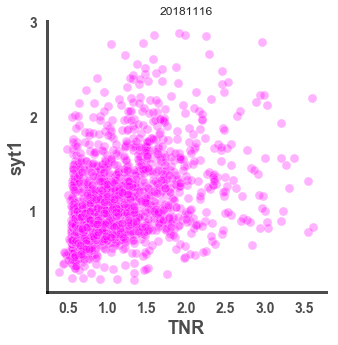

In [112]:
for exp in df["expname"].unique():
    df2plot=df2[df2["expname"]==exp]
    from matplotlib import ticker
    sns.set(font_scale=2.5)
    sns.set(font="Arial")
    sns.set_style("white")
    sns.despine()
    sns.set_palette("Set2")

    fig=plt.figure(figsize=(5,5))
    g=sns.scatterplot(x="syt mean int norm2med",
                      y="ecm mean int norm2med",data=df2plot,
                   color="magenta",alpha=0.3,s=80)
    #g.set_xscale('log')
    plt.title('')
    plt.locator_params(axis='y', nbins=5)
    plt.yticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)
    plt.xticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)


    g.tick_params(width=3,color='black')
    #g.set_ylabel('Fluorescence intensity (AU)',color='black',alpha=.7,labelpad=3,size=28,weight='bold')
    g.set_ylabel('syt1',color='black',alpha=.7,fontsize=18,weight='bold')
    g.set_xlabel('TNR',color='black',alpha=.7,fontsize=18,weight='bold')
    g.grid(False)

    sns.despine(ax=g,right=True,top=True)
    for axis in ['top','bottom','left','right']:
      g.spines[axis].set_linewidth(3)
      g.spines[axis].set_color('black')
      g.spines[axis].set_alpha(.7)

    #scale_x=1/10
    #ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
    #g.xaxis.set_major_formatter(ticks_x)
    plt.title(exp)




## Split into bins according to vglut intensity, look at average TNR intensity in each bin, for each exp separately

In [91]:
number_of_bins=5

In [92]:
df2["Synapse brightness scale (0 = dimmest)"]=pd.cut(df2["syt mean int norm2med"],
                                                    bins=number_of_bins,labels=np.arange(number_of_bins),
                                                    right=False)

## average tnr in each bin

0


TypeError: Invalid dimensions for image data

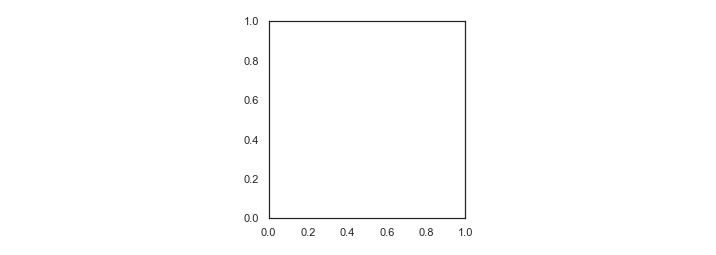

In [217]:
mean_vglut_int_in_bin=[]
mean_tnr_int_in_bin=[]

for i in range(number_of_bins):
    df2plot=df2[(df2["Synapse brightness scale (0 = dimmest)"].astype(int)==i)&
                (df2["Time"]!="Unblocked Control")]
    print(i)
    fig=plt.figure(figsize=(12,4))
    plt.axis('off')
    fig.add_subplot(132)
    plt.imshow(df2plot["ecm mean int norm2med"].mean()
               ,cmap='hot',
               vmin=0.95*np.min(df2["ecm_around_single_spot bg subtracted"].mean()),
               vmax=10*np.max(df2["ecm_around_single_spot bg subtracted"].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    plt.ylabel('Bin: '+str(i))
    fig.add_subplot(131)
    plt.imshow(df2plot["original_synapse_at_single_spot bg subtracted"].mean(),
               cmap='viridis',
               vmin=0,#np.min(df2plot["original_synapse_at_single_spot bg subtracted"].mean()),
               vmax=52*np.max(df2["original_synapse_at_single_spot bg subtracted"].mean()))
    numbersynapses=len(df2plot["original_synapse_at_single_spot bg subtracted"])
    print(str(i)+': '+str(numbersynapses)+' synapses')
    
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    
    '''ax=fig.add_subplot(133)
    plt.plot(np.linspace(0,70*20,num=20,endpoint=False),
             df2plot["radial_average_bgsubtracted"].values.mean()/maxradav
             ,linewidth=6,color='blue')
    numbersynapses=len(df2plot["original_synapse_at_single_spot bg subtracted"]) 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    plt.ylim([0.7,1])
    plt.xlim([0,500])
    plt.xticks(size = 18)
    plt.yticks(ax.get_yticks(),[0,1,2,3,4],size = 18)
    plt.axhline(y=0.85, xmin=0, xmax=500,color='k',linestyle='dashed')
    #ax.text(.5,.1,'No of synapses: '+str(numbersynapses),
     #   horizontalalignment='center',
     #       verticalalignment='bottom',size=16,
     #   transform=ax.transAxes)
    '''
    plt.locator_params(axis='y', nbins=3)
    plt.locator_params(axis='x', nbins=5)
    plt.ylabel('',size=16,labelpad=5)
    plt.xlabel('nm',size=16,labelpad=5)
    #plt.subplots_adjust(right=1.2)
    plt.tight_layout()
  

In [105]:
##sort df according to synapse intensity
df3=deepcopy(df2)
df3=df3.sort_values("syt mean int norm2med",ascending=True)
df3=df3.reset_index(drop=True)
#split into 5 separate dfs, add column with number
a, b, c,d,e = np.split(df3, [int(.2*len(df3)),int(.4*len(df3)),int(.6*len(df3)),int(.8*len(df3))])
a['Synapse mean intensity ordinal bin']=0
b['Synapse mean intensity ordinal bin']=1
c['Synapse mean intensity ordinal bin']=2
d['Synapse mean intensity ordinal bin']=3
e['Synapse mean intensity ordinal bin']=4
#combine split dfs into one
dfnew=pd.concat([a,b,c,d,e],axis=0,ignore_index=True)

In [234]:
#synapse_bin_type="Synapse brightness scale (0 = dimmest)"
synapse_bin_type='Synapse mean intensity ordinal bin'

means_in_bins_exps={"Exp name":[],"bin number":[],"mean syt":[],"mean tnr":[],"number of spots":[],
                    "mean syt int in bin overall":[]}



for exp in dfnew["expname"].unique():
    dfexp=dfnew[dfnew["expname"]==exp]
    for i in range(0,5):
        
        mean_in_bin=dfnew[dfnew[synapse_bin_type].astype(int)==i]["syt mean int norm2med"].mean()
        
        dfplot=dfexp[(dfexp[synapse_bin_type].astype(int)==i)&
                    (dfexp["Time"]!="Unblocked Control")]

        means_in_bins_exps["Exp name"].append(exp)
        means_in_bins_exps["bin number"].append(i)
        means_in_bins_exps["mean syt int in bin overall"].append(mean_in_bin)
        means_in_bins_exps["mean syt"].append(dfplot["syt mean int norm2med"].mean())
        means_in_bins_exps["mean tnr"].append(dfplot["ecm mean int norm2med"].mean())
        nosynapses=len(dfplot)
        means_in_bins_exps["number of spots"].append(nosynapses)

In [235]:
dfmeans=pd.DataFrame(means_in_bins_exps)
dfmeans["mean syt int in bin overall"]=np.around(dfmeans["mean syt int in bin overall"],1)

<Figure size 432x288 with 0 Axes>

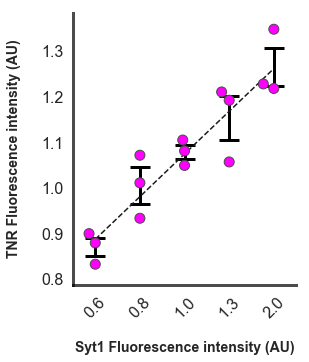

In [272]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
plt.figure(figsize=(4,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

'''g=sns.barplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color='magenta')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

change_width(g, .7)'''

g=sns.swarmplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans,size=10,color='magenta',linewidth=1)

plt.errorbar(x=[0,1,2,3,4],
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)

#g.hlines(dfmeans[dfmeans["bin number"]==0][var].mean(), xmin=-0.2, xmax=0.6, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==1][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==2][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==3][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==4][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')



#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('Syt1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



x = np.arange(0,5,1)
y = [dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()] # 10, not 9, so the fit isn't perfect

m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, '--k') 
 

<Figure size 432x288 with 0 Axes>

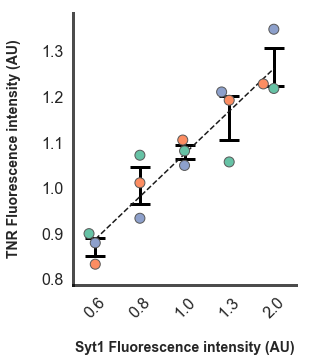

In [413]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
plt.figure(figsize=(4,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

'''g=sns.barplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color='magenta')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

change_width(g, .7)'''

g=sns.swarmplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans,size=10,hue="Exp name",linewidth=1)

plt.errorbar(x=[0,1,2,3,4],
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)

#g.hlines(dfmeans[dfmeans["bin number"]==0][var].mean(), xmin=-0.2, xmax=0.6, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==1][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==2][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==3][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==4][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')



#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('Syt1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



x = np.arange(0,5,1)
y = [dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()] # 10, not 9, so the fit isn't perfect

m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, '--k') 
g.get_legend().set_visible(False)

In [273]:
from pydoc import help
from scipy.stats.stats import pearsonr
pearsonr(df2["ecm mean int norm2med"],df2["syt mean int norm2med"])

(0.2637173170059487, 1.475383006429233e-93)

In [274]:
from pydoc import help
from scipy.stats.stats import pearsonr
pearsonr(dfmeans["mean tnr"],dfmeans["mean syt int in bin overall"])

(0.8892857368254216, 9.19296311025351e-06)

## Representative images

In [278]:
df2plot.columns

Index(['index', 'filename', 'exp condition', 'ecm_around_single_spot',
       'ecm_around_single_spot_mean_intensity',
       'ecm_around_single_spot bg subtracted',
       'ecm_around_single_spot_mean_intensity bg subtracted',
       'original_synapse_at_single_spot', 'mean_intensty_original_synapse',
       'original_synapse_at_single_spot bg subtracted',
       'mean_intensty_original_synapse bg subtracted', 'Time', 'Drug',
       'Condition', 'expname', 'ecm mean int norm2med',
       'syt mean int norm2med', 'Synapse brightness scale (0 = dimmest)',
       'Synapse mean intensity ordinal bin'],
      dtype='object')

4: 1168 synapses


(-0.5, 99.5, 99.5, -0.5)

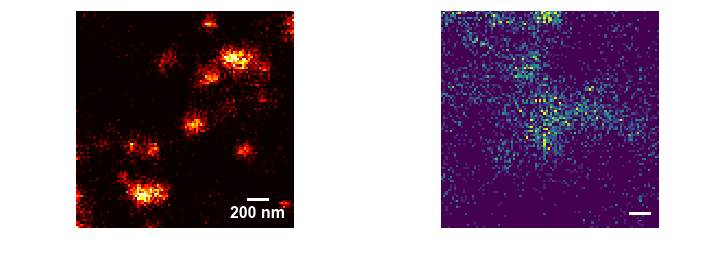

In [411]:
binno=2


df2plot=dfnew[dfnew[synapse_bin_type].astype(int)==binno]
df2plot=df2plot.reset_index()
randomno=np.random.randint(1,len(df2plot))

fig=plt.figure(figsize=(12,4))
plt.axis('off')
fig.add_subplot(121)
plt.imshow(df2plot["ecm_around_single_spot bg subtracted"][randomno]
           ,cmap='hot',
           vmin=0.95*np.min(dfnew["ecm_around_single_spot bg subtracted"].mean()),
           vmax=20*np.max(dfnew["ecm_around_single_spot bg subtracted"].mean()))
scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                   font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.axis('off')
plt.ylabel('Bin: '+str(i))
fig.add_subplot(122)
plt.imshow(df2plot["original_synapse_at_single_spot bg subtracted"][randomno],
           cmap='viridis',
           vmin=0.95*np.min(dfnew["original_synapse_at_single_spot bg subtracted"].mean()),
           vmax=np.max(dfnew["original_synapse_at_single_spot bg subtracted"].mean()))
numbersynapses=len(df2plot["original_synapse_at_single_spot bg subtracted"])
print(str(i)+': '+str(numbersynapses)+' synapses')

scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                   font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.axis('off')

0
0: 1168 synapses
1
1: 1169 synapses
2
2: 1168 synapses
3
3: 1169 synapses
4
4: 1169 synapses


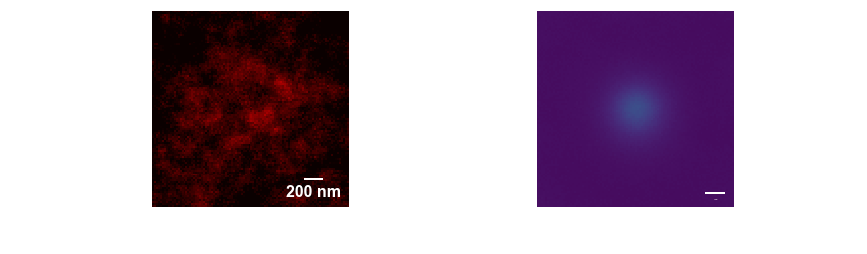

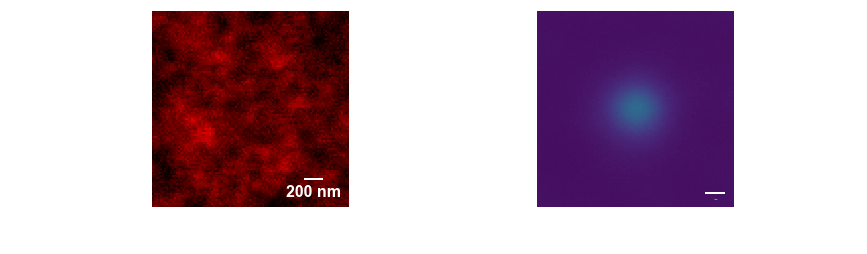

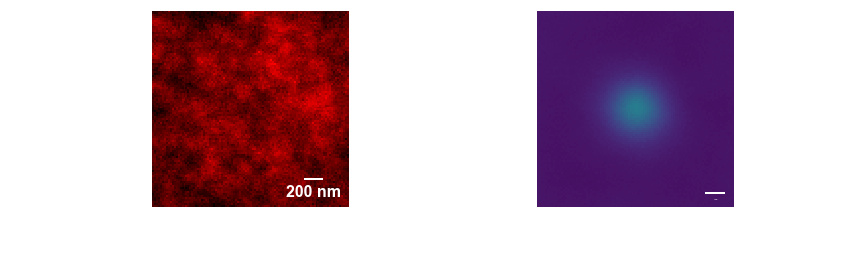

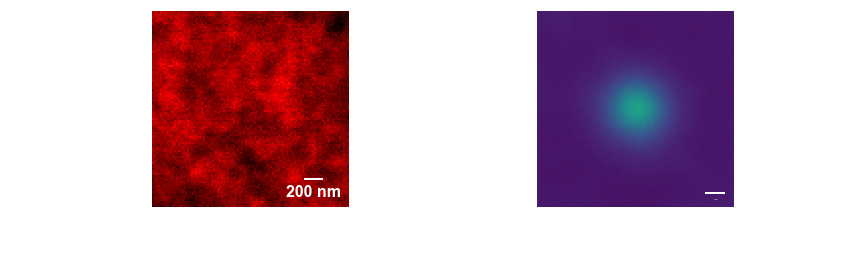

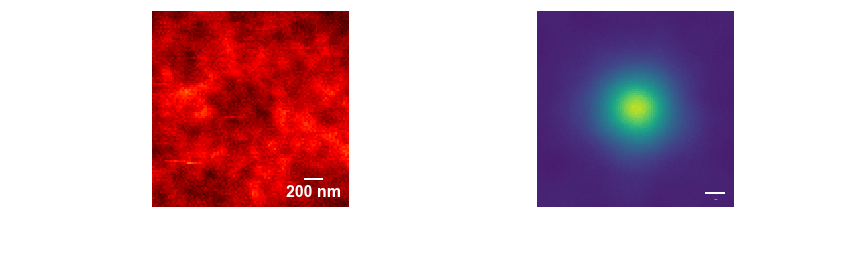

In [405]:
mean_vglut_int_in_bin=[]
mean_tnr_int_in_bin=[]

for i in range(number_of_bins):
    df2plot=dfnew[dfnew[synapse_bin_type].astype(int)==i]
    print(i)
    fig=plt.figure(figsize=(12,4))
    plt.axis('off')
    fig.add_subplot(121)
    plt.imshow(df2plot["ecm_around_single_spot bg subtracted"].mean()
               ,cmap='hot',
               vmin=0.95*np.min(dfnew["ecm_around_single_spot bg subtracted"].mean()),
               vmax=2*np.max(dfnew["ecm_around_single_spot bg subtracted"].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    plt.ylabel('Bin: '+str(i))
    fig.add_subplot(122)
    plt.imshow(df2plot["original_synapse_at_single_spot bg subtracted"].mean(),
               cmap='viridis',
               vmin=0,#np.min(dfnew["original_synapse_at_single_spot bg subtracted"].mean()),
               vmax=2*np.max(dfnew["original_synapse_at_single_spot bg subtracted"].mean()))
    numbersynapses=len(df2plot["original_synapse_at_single_spot bg subtracted"])
    print(str(i)+': '+str(numbersynapses)+' synapses')
    
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    
    '''ax=fig.add_subplot(133)
    plt.plot(np.linspace(0,70*20,num=20,endpoint=False),
             df2plot["radial_average_bgsubtracted"].values.mean()/maxradav
             ,linewidth=6,color='blue')
    numbersynapses=len(df2plot["original_synapse_at_single_spot bg subtracted"]) 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    plt.ylim([0.7,1])
    plt.xlim([0,500])
    plt.xticks(size = 18)
    plt.yticks(ax.get_yticks(),[0,1,2,3,4],size = 18)
    plt.axhline(y=0.85, xmin=0, xmax=500,color='k',linestyle='dashed')
    #ax.text(.5,.1,'No of synapses: '+str(numbersynapses),
     #   horizontalalignment='center',
     #       verticalalignment='bottom',size=16,
     #   transform=ax.transAxes)
    '''
    plt.locator_params(axis='y', nbins=3)
    plt.locator_params(axis='x', nbins=5)
    plt.ylabel('',size=16,labelpad=5)
    plt.xlabel('nm',size=16,labelpad=5)
    #plt.subplots_adjust(right=1.2)
    plt.tight_layout()
  